In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels

warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("heart_2020_cleaned.csv")
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
def var_encoding(df):
    df["Sex"] = df["Sex"].replace({"Female": 0, "Male": 1})
    df["GenHealth"] = df["GenHealth"].replace({"Poor": 0, "Fair": 1, "Good": 2, "Very good": 3, "Excellent": 4})
    df["AgeCategory"] = df["AgeCategory"].replace({"18-24": 1, "25-29": 2, "30-34": 3, "35-39": 1, "40-44": 2, "45-49": 3,
                                                   "50-54": 4, "55-59": 5, "60-64": 6, "65-69": 7, "70-74": 8, "75-79": 9,
                                                   "80 or older": 10})
    
    df['Diabetic'] = df['Diabetic'].map({'No': 0,'No, borderline diabetes': 1,'Yes (during pregnancy)': 2,'Yes': 3})
    df = df.replace({'Yes': 1,'No': 0})

    df = pd.get_dummies(df, columns=['Race'], dtype='int')
    return df

data = var_encoding(data)
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,SleepTime,Asthma,KidneyDisease,SkinCancer,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0,16.60,1,0,0,3.0,30.0,0,0,5,...,5.0,1,0,1,0,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,10,...,7.0,0,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,7,...,8.0,1,0,0,0,0,0,0,0,1
3,0,24.21,0,0,0,0.0,0.0,0,0,9,...,6.0,0,0,1,0,0,0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,2,...,8.0,0,0,0,0,0,0,0,0,1


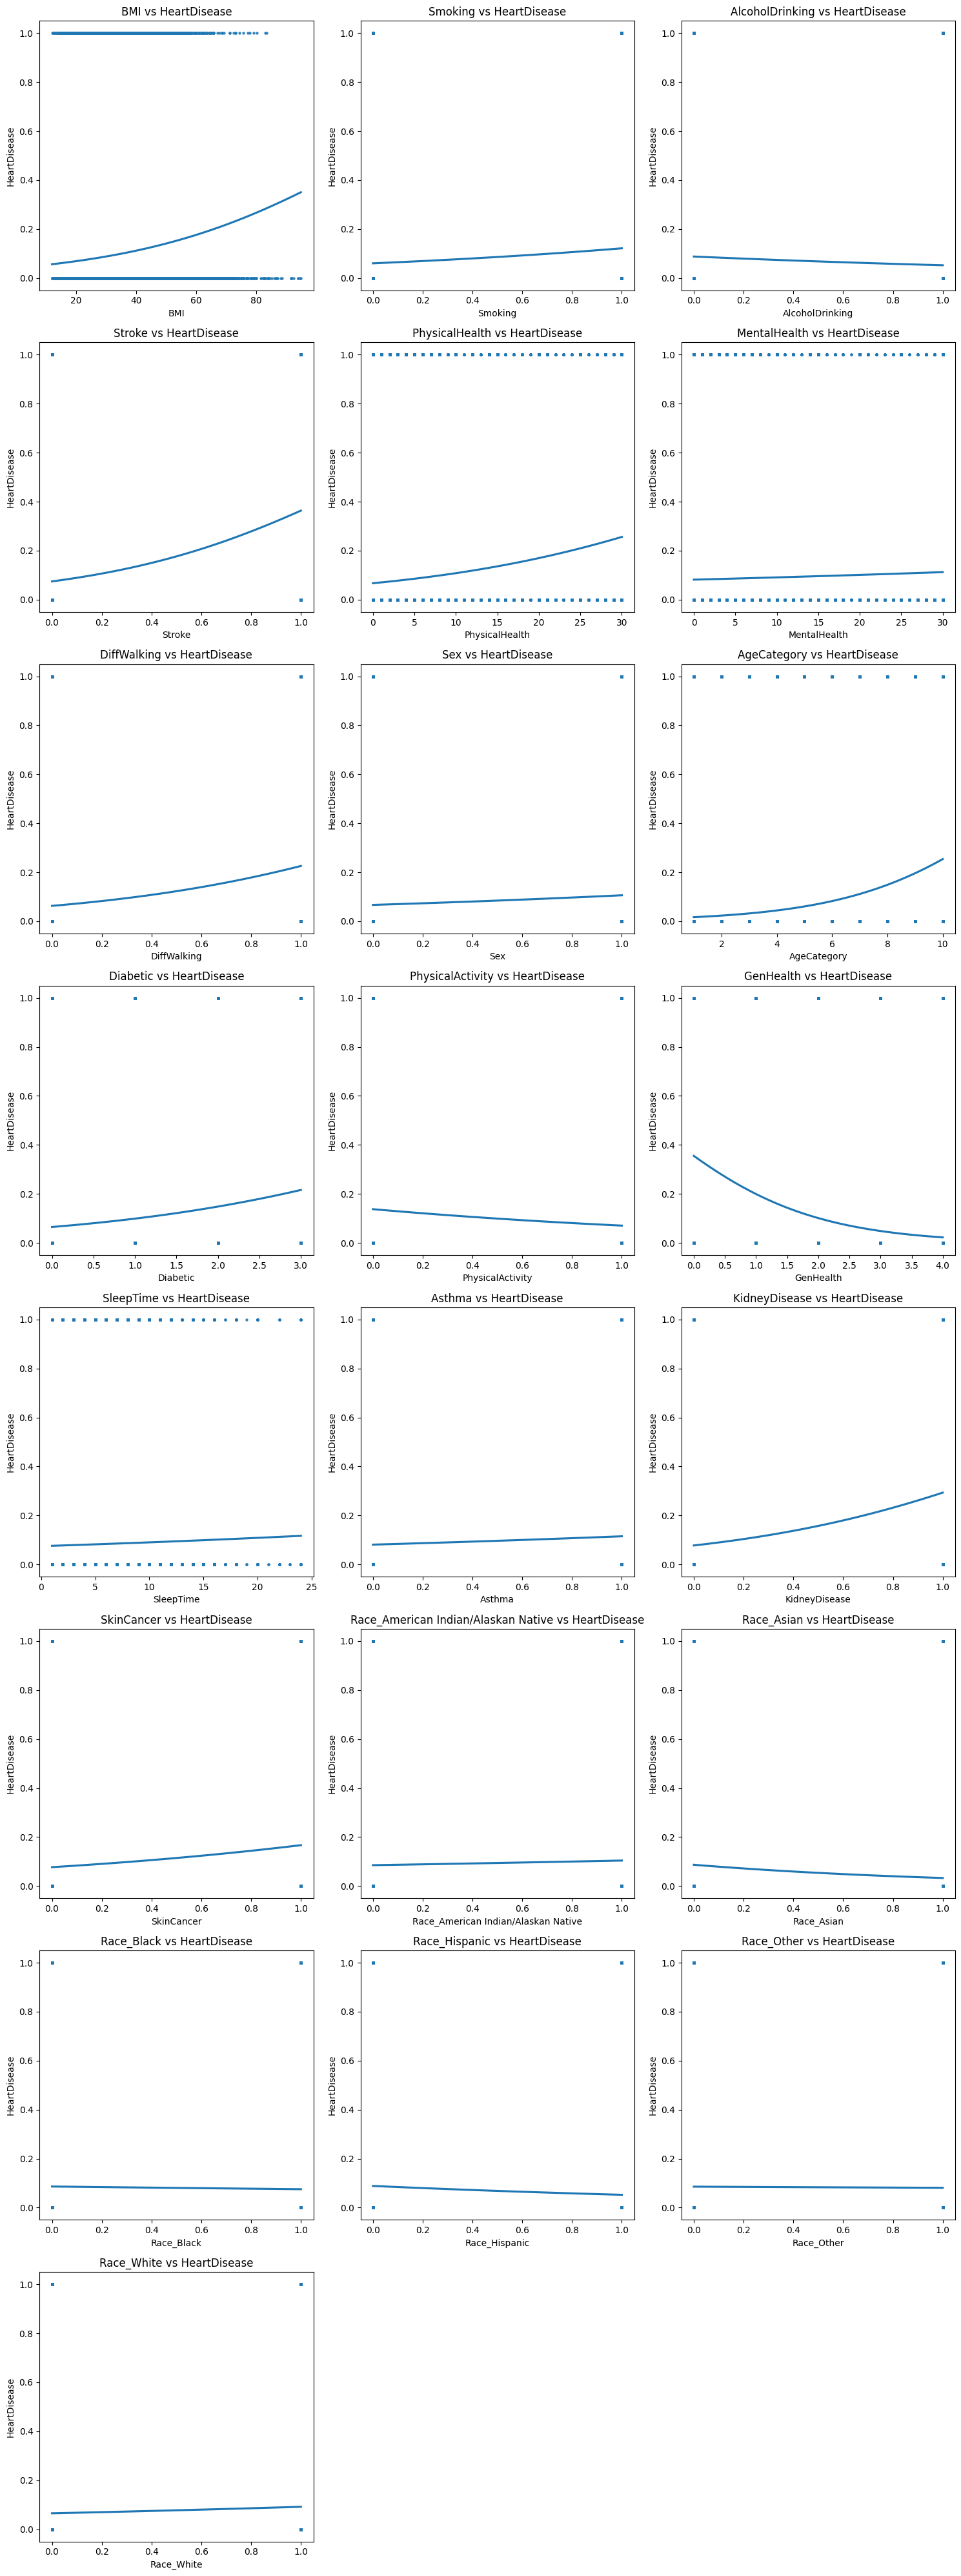

In [4]:
numerical_vars = data.select_dtypes(include='number').columns.drop("HeartDisease").to_list()
ncols = 3
nrows = -(-len(numerical_vars) // ncols)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()

for i, variable in enumerate(numerical_vars):
    ax = axes[i]
    sns.regplot(x=variable, y="HeartDisease", data=data, ax=ax, scatter_kws={'s':5}, logistic = True, ci=None)  # scatter_kws is to control point size
    ax.set_title(f'{variable} vs HeartDisease')
    ax.set_xlabel(variable)
    ax.set_ylabel('HeartDisease')

for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

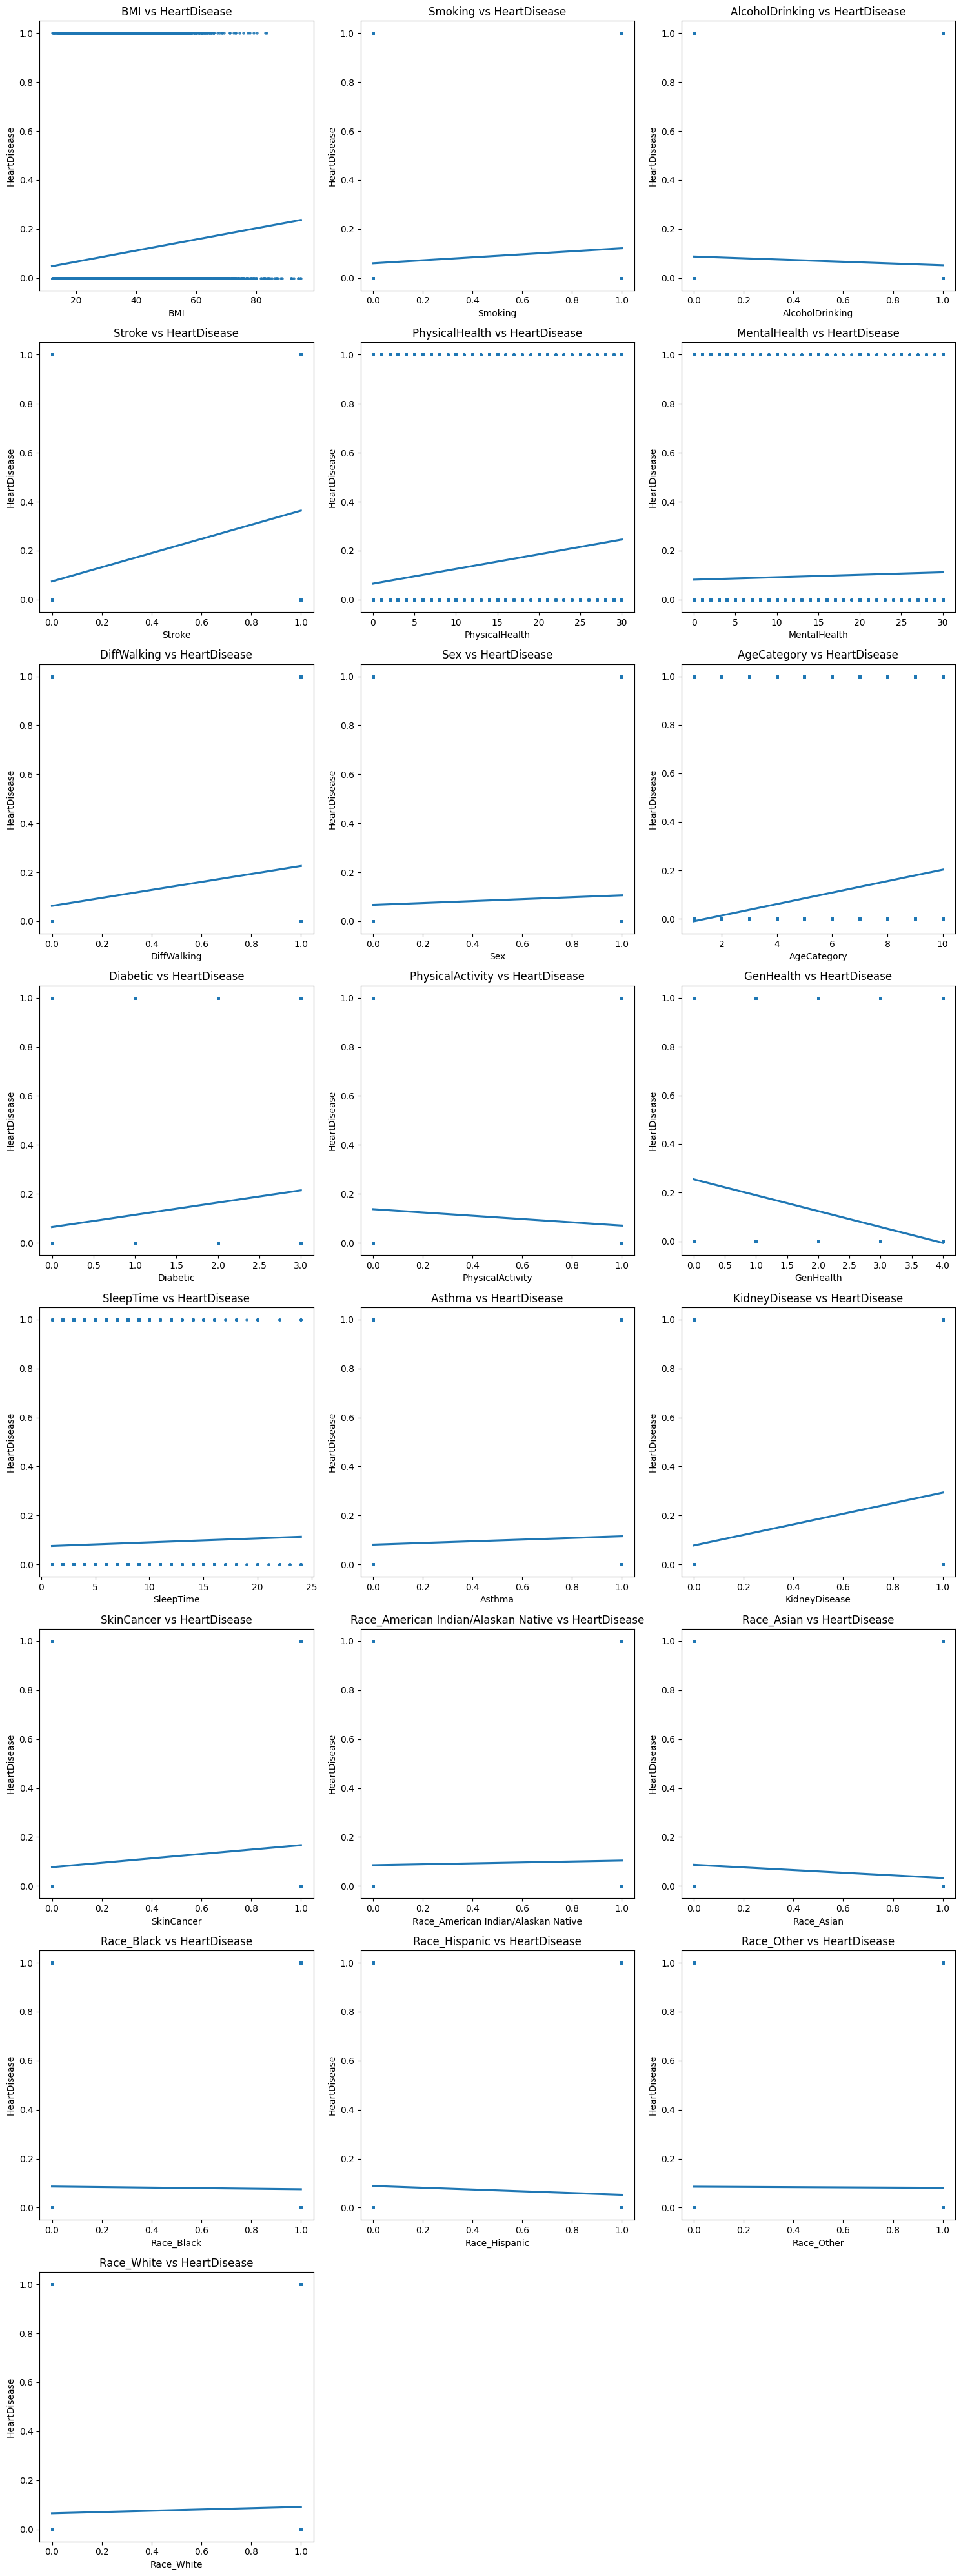

In [5]:
numerical_vars = data.select_dtypes(include='number').columns.drop("HeartDisease").to_list()
ncols = 3
nrows = -(-len(numerical_vars) // ncols)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()

for i, variable in enumerate(numerical_vars):
    ax = axes[i]
    sns.regplot(x=variable, y="HeartDisease", data=data, ax=ax, scatter_kws={'s':5}, ci = None)  # scatter_kws is to control point size
    ax.set_title(f'{variable} vs HeartDisease')
    ax.set_xlabel(variable)
    ax.set_ylabel('HeartDisease')

for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()